In [1]:
# Ejercicio de aplicación de regresión lineal múltiple
# Utilizando datos de mediciones en línea
# presupuesto publicidad cada mes

# Proceso de pipeline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, sep=',', index_col=0)

print("Vista del Dataset")
print(df.head())

print("Información general del DataFrame")
print(df.info())

Vista del Dataset
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [2]:
# Inspección de datos (validación o verificación datos nulos)
print("Conteo de valores nulos")
print(df.isnull().sum())

Conteo de valores nulos
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [3]:
# División del conjunto de datos
x = df.drop("radio", axis=1)
y = df["radio"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento {x_train.shape}, Prueba {x_test.shape}")

Datos de entrenamiento (160, 3), Prueba (40, 3)


In [4]:
# Escalamiento de características

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
# Creación y entrenamiento del modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Predicción de datos
y_pred = model.predict(x_test_scaled)

print("Primeras predicciones")
print(y_pred[:10])

Primeras predicciones
[ 3.28214665e+01  4.81379393e+01  2.75710102e+01  2.13404513e+01
  4.90896970e+01  3.12675713e+01  4.23855692e+01  1.72146547e+01
 -4.85506101e-02  2.18393294e+01]


In [6]:
# Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo")
print(f"Error cuadrático medio (MSE) {mse:.3f}")
print(f"Raíz del error cuadrático medio (RMSE) {rmse:.3f}")
print(f"R cuadrado (coeficiente de determinación) {r2:.4f}")

Evaluación del modelo
Error cuadrático medio (MSE) 64.368
Raíz del error cuadrático medio (RMSE) 8.023
R cuadrado (coeficiente de determinación) 0.7105


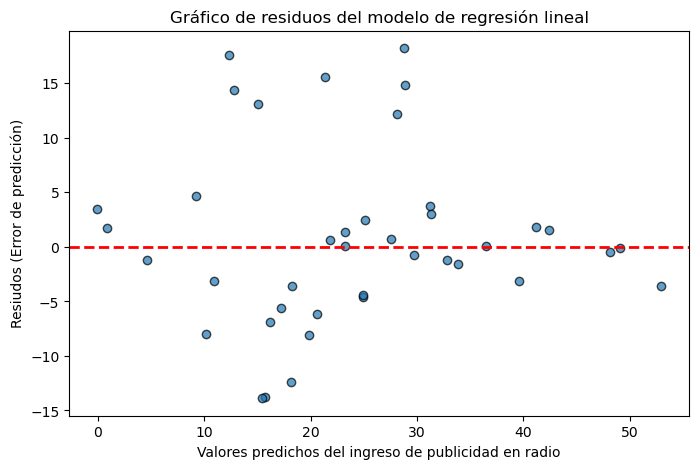

In [7]:
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Gráfico de residuos del modelo de regresión lineal")
plt.xlabel("Valores predichos del ingreso de publicidad en radio")
plt.ylabel("Resiudos (Error de predicción)")

plt.show()